In [6]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
from datetime import timedelta
import json
from pandas.core.base import DataError
import requests
from requests.auth import HTTPBasicAuth
import sys
from pathlib import Path
sys.path.insert(1, '../src2/utils/')
sys.path.insert(1, '../src2/data/')
import functions
import cv19data

In [105]:
import importlib

In [261]:
importlib.reload(cv19data)

<module 'cv19data' from '../src2/data/cv19data.py'>

# Creating df from data

In [262]:
initdate = datetime(2020,10,19)
enddate = datetime.now()
tdelta = enddate - initdate 
dates = [initdate + timedelta(days=i) for i in range(tdelta.days + 1) ] 
days = [i for i in range(tdelta.days + 1)] 
df = pd.DataFrame({'day':days,'date':dates})

## Import data

In [263]:
data = cv19data.ImportData(tstate = '13',initdate=initdate)

In [259]:
data.importAccumulatedInfected()
data.importActiveInfected()
data.importDailyInfected()

Importing Accumulated Infected
updating database
Importing Active infected
updating database
Importing Daily Infected
updating database


In [264]:
data.importdata()

Importing General Data
Importing Population
Importing Active infected
updating database
Importing Accumulated Infected
updating database
Importing Daily Infected
updating database
Importing ICU Beds Data
updating database
Importing Deaths by DEIS
updating database
Done


In [265]:
data.data

,day,dates,I,I_ac,I_d,UCI_capacity,UCI_use_covid,UCI_use_noncovid,D_confirmed,D_suspected,D_ac_confirmed,D_ac_suspected
0,0,2020-10-19,3900.0,313728.0,446.0,1180.0,351.0,684.0,19.0,4.0,19.0,4.0
1,1,2020-10-20,NaN,NaN,442.0,1178.0,358.0,682.0,27.0,6.0,46.0,10.0
2,2,2020-10-21,NaN,NaN,430.0,1169.0,367.0,648.0,15.0,6.0,61.0,16.0
3,3,2020-10-22,NaN,NaN,421.0,1166.0,366.0,666.0,17.0,2.0,78.0,18.0
4,4,2020-10-23,NaN,NaN,416.0,1165.0,352.0,675.0,20.0,5.0,98.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...
137,137,2021-03-05,8930.0,410369.0,1490.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
138,138,2021-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,139,2021-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
140,140,2021-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
%matplotlib tk

In [275]:
data.plot('dates','D_ac_suspected')
data.plot('dates','D_ac_confirmed')
plt.show()

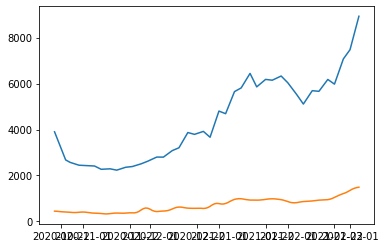

In [220]:
plt.plot(data.data[['date','I']].dropna()['date'],data.data[['date','I']].dropna()['I'])
plt.plot(data.data[['date','I_d']].dropna()['date'],data.data[['date','I_d']].dropna()['I_d'])

In [205]:
plt.plot(data.data['date'],data.data['I'].fillna())

ValueError: Must specify a fill 'value' or 'method'.

In [110]:
data.importAccumulatedInfectedMinCiencia()

Importing Accumulated Infected
updating database


In [111]:
data.importActiveInfectedMinciencia()

Importing Active Infected by Minciencia
updating database


In [136]:
        endpoint_counties = 'getNewCasesAllCounties'
        endpoint_regions = 'getNewCasesAllStates'
        endpoint_national = 'getNationalNewCases'

In [143]:
I_d_national = pd.DataFrame(data.request(endpoint_national).json()['cases'])
I_d_national_dates= pd.DataFrame(data.request(endpoint_national).json()['dates'])

In [149]:
type(I_d_national[0])

pandas.core.series.Series

In [154]:
I_d_counties = pd.DataFrame(data.request(endpoint_counties).json()['data'])
I_d_counties_dates= pd.DataFrame(data.request(endpoint_counties).json()['dates'])

In [161]:
I_d_regions = pd.DataFrame(data.request(endpoint_regions).json()['data'])
I_d_regions_dates= pd.DataFrame(data.request(endpoint_regions).json()['dates'])

In [176]:
I_d_counties[['10101','10102']]

,10101,10102
0,1,0
1,1,0
2,2,0
3,2,0
4,2,0
...,...,...
334,114,15
335,116,15
336,116,15
337,116,15


In [191]:
states = ['13','11']
counties = []
#counties = ['12101','12102']

In [192]:
aux = []

In [193]:
            for i in states:
                aux.append(I_d_counties.filter(regex='^'+i,axis=1))
            
            aux.append(I_d_counties[counties])
            I_d_r = np.array(pd.concat(aux, axis=1).sum(axis=1))

In [196]:
I_d_regions['13']

0       146
1       142
2       140
3       140
4       141
       ... 
336    1350
337    1404
338    1443
339    1471
340    1490
Name: 13, Length: 341, dtype: int64

In [194]:
I_d_r

array([ 127,  132,  139,  147,  155,  170,  195,  218,  237,  247,  245,
        229,  226,  233,  253,  263,  272,  265,  261,  253,  259,  273,
        294,  316,  356,  416,  482,  550,  630,  711,  794,  873,  952,
       1019, 1066, 1089, 1108, 1115, 1176, 1292, 1456, 1644, 1792, 1872,
       1879, 1949, 2132, 2426, 2787, 3125, 3358, 3492, 3505, 3506, 3509,
       3505, 3543, 3616, 3731, 3818, 3851, 3810, 3711, 3653, 3689, 3814,
       4011, 4181, 4305, 4377, 4413, 4477, 4571, 4643, 4677, 4651, 4587,
       4473, 4356, 4241, 4147, 4018, 3880, 3736, 3600, 3484, 3320, 3124,
       2894, 2656, 2476, 2386, 2377, 2389, 2339, 2221, 2054, 1917, 1819,
       1775, 1788, 1764, 1706, 1611, 1506, 1380, 1258, 1141, 1065, 1009,
        980,  989, 1001,  992,  963,  905,  843,  787,  742,  716,  704,
        701,  713,  737,  760,  786,  820,  846,  869,  881,  879,  855,
        830,  790,  756,  727,  699,  666,  629,  602,  587,  591,  604,
        633,  653,  669,  673,  673,  675,  676,  6

In [184]:
aux = []
for i in states:
    aux.append(I_d_counties.filter(regex='^'+i,axis=1))

In [185]:
aux

[     13101  13102  13103  13104  13105  13106  13107  13108  13109
 0       11      0      2      2      3      2      2      2      0
 1       12      0      2      2      3      2      2      2      1
 2       14      0      2      3      2      3      2      2      1
 3       16      0      2      3      2      3      3      2      2
 4       18      1      2      3      2      3      3      2      2
 ..     ...    ...    ...    ...    ...    ...    ...    ...    ...
 334     93     16     22     20     37     34     12     20     19
 335     97     17     23     21     38     36     13     22     18
 336    100     19     23     21     40     38     13     23     17
 337    102     20     24     21     42     39     14     25     17
 338    104     21     24     22     43     40     14     26     16
 
 [339 rows x 9 columns],
      11101  11102
 0        0      0
 1        0      0
 2        0      0
 3        0      0
 4        0      0
 ..     ...    ...
 334     13      0
 335 

In [168]:
I_d_regions_dates[0]

0      2020-03-30T03:00:00.000Z
1      2020-03-31T03:00:00.000Z
2      2020-04-01T03:00:00.000Z
3      2020-04-02T03:00:00.000Z
4      2020-04-03T03:00:00.000Z
                 ...           
336    2021-03-01T03:00:00.000Z
337    2021-03-02T03:00:00.000Z
338    2021-03-03T03:00:00.000Z
339    2021-03-04T03:00:00.000Z
340    2021-03-05T03:00:00.000Z
Name: 0, Length: 341, dtype: object

In [169]:
I_d_counties_dates[0]

0      2020-04-01T03:00:00.000Z
1      2020-04-02T03:00:00.000Z
2      2020-04-03T03:00:00.000Z
3      2020-04-04T03:00:00.000Z
4      2020-04-05T04:00:00.000Z
                 ...           
334    2021-03-01T03:00:00.000Z
335    2021-03-02T03:00:00.000Z
336    2021-03-03T03:00:00.000Z
337    2021-03-04T03:00:00.000Z
338    2021-03-05T03:00:00.000Z
Name: 0, Length: 339, dtype: object

In [165]:
I_d_regions['10']

0       27
1       26
2       25
3       23
4       22
      ... 
336    393
337    401
338    403
339    405
340    406
Name: 10, Length: 341, dtype: int64

In [153]:
aux.keys()

dict_keys(['dates', 'data'])

## Create pandas dataframe out of data

In [81]:
def dfappend(df,values,days,dataname):
    length = len(df)
    aux = [np.nan for i in range(length)]
    iterator = iter(values)
    for i in days:
        aux[i] = next(iterator)
    auxdf = pd.DataFrame({dataname:aux})
    return pd.concat([df,auxdf],axis=1)

In [82]:
dfappend(df,data.Ir,data.tr,'I')

,day,date,I
0,0,2020-10-19,3900.0
1,1,2020-10-20,NaN
2,2,2020-10-21,NaN
3,3,2020-10-22,NaN
4,4,2020-10-23,NaN
...,...,...,...
132,132,2021-02-28,NaN
133,133,2021-03-01,7474.0
134,134,2021-03-02,NaN
135,135,2021-03-03,NaN


In [50]:
length = len(df)

aux = [np.nan for i in range(length)]
iterator = iter(data.Ir)
for i in data.tr:
    aux[i] = next(iterator)

In [74]:
Ir = pd.DataFrame({'I':aux})

In [77]:
pd.concat([df,Ir],axis=1)

,day,date,I
0,0,2020-10-19,3900.0
1,1,2020-10-20,NaN
2,2,2020-10-21,NaN
3,3,2020-10-22,NaN
4,4,2020-10-23,NaN
...,...,...,...
132,132,2021-02-28,NaN
133,133,2021-03-01,7474.0
134,134,2021-03-02,NaN
135,135,2021-03-03,NaN


In [78]:
df

,day,date
0,0,2020-10-19
1,1,2020-10-20
2,2,2020-10-21
3,3,2020-10-22
4,4,2020-10-23
...,...,...
132,132,2021-02-28
133,133,2021-03-01
134,134,2021-03-02
135,135,2021-03-03


In [71]:
h  = [1,2,3,4]

In [72]:
h.extend([1,2,3])

In [73]:
h

[1, 2, 3, 4, 1, 2, 3]

In [63]:
df

,day,date
0,0,2020-10-19
1,1,2020-10-20
2,2,2020-10-21
3,3,2020-10-22
4,4,2020-10-23
...,...,...
132,132,2021-02-28
133,133,2021-03-01
134,134,2021-03-02
135,135,2021-03-03


In [35]:
len(data.tr)

39

In [23]:
data.tr

[0,
 5,
 7,
 11,
 14,
 18,
 21,
 25,
 28,
 32,
 35,
 39,
 42,
 46,
 49,
 53,
 56,
 60,
 63,
 67,
 70,
 74,
 77,
 81,
 84,
 88,
 91,
 95,
 98,
 102,
 105,
 109,
 112,
 116,
 119,
 123,
 126,
 130,
 133]